In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

plt.rcParams["figure.figsize"] = (15,10)

In [14]:
p1_bkgd = stats.norm.rvs(loc=0, scale=3, size=1000000)

signal_low = 0.0
signal_high = 20.0
p1_signal = np.random.uniform(low=signal_low, high=signal_high, size=1000000)

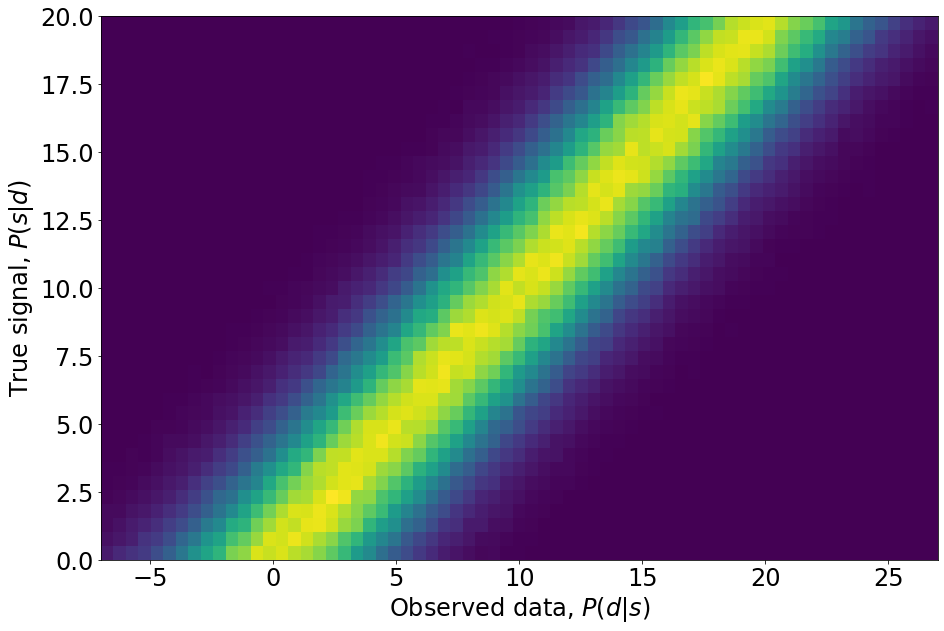

In [15]:
p1_data = p1_bkgd + p1_signal

# define our bin edges
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

# group the results into bins
p1_Psd, temp, temp2 = np.histogram2d(p1_data, p1_signal, bins=[dataedges,signaledges], density=True)
# note: temp == dataedges and temp2 == signaledges

# plot
def plot_2d_hist(signaledges, dataedges, Psd):
    datacenters = (dataedges[:-1] + dataedges[1:]) / 2
    signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
    plt.pcolormesh(datacenters, signalcenters, Psd.T, shading='auto')
    plt.tick_params(labelsize=24)
    plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
    plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
    plt.show()

plot_2d_hist(signaledges, dataedges, p1_Psd)

## Problem 1b

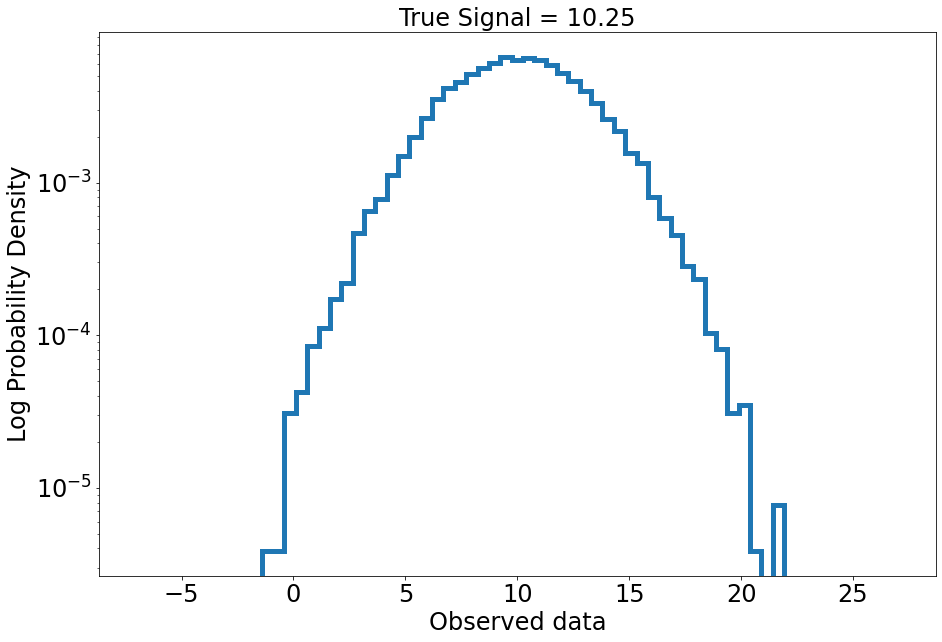

In [16]:
p1_true_signal = 10.25


p1_true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= p1_true_signal and signaledges[i+1] >= p1_true_signal:
        p1_true_signal_bin_idx = i
        break
        

p1_true_signal_probs = p1_Psd[:, p1_true_signal_bin_idx]


plt.stairs(p1_true_signal_probs, dataedges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'True Signal = {p1_true_signal:.2f}', fontsize=24)
plt.xlabel('Observed data', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a horizontal slice from the histogram plot. Thus the above plot gives a probability of Observed signals for a True Signal of 10.25 for our background which is a zero mean and std. dev = 3.The mean for our plot is at 10.25.

## Part 1C

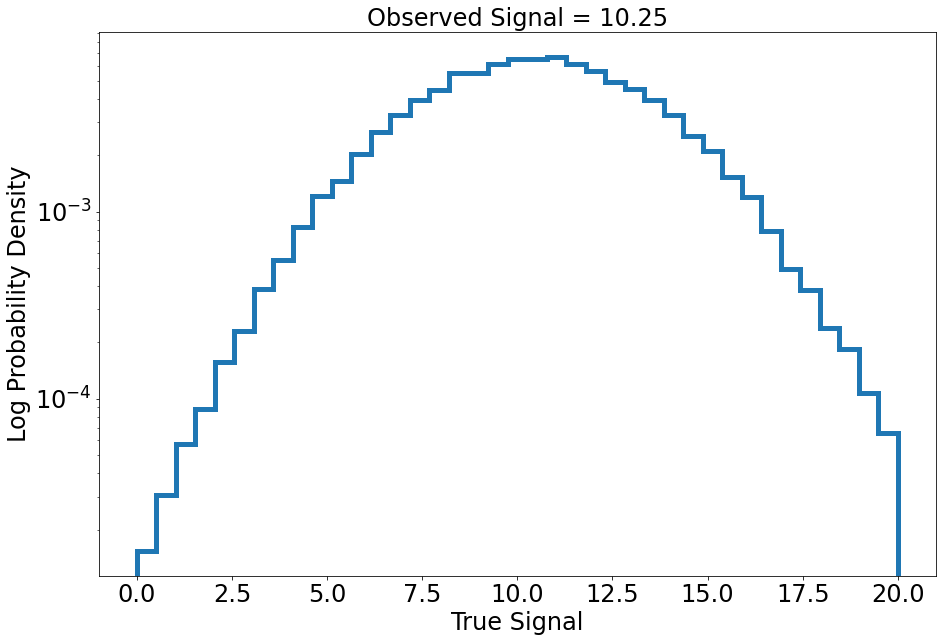

In [17]:
p1_observed_signal_bin_idx = 34
p1_observed_signal = dataedges[p1_observed_signal_bin_idx]
        
# now that we have the bin for our signal we can get the associated histogram data
p1_observed_signal_probs = p1_Psd[p1_observed_signal_bin_idx, :]

# plot a stair plot
plt.stairs(p1_observed_signal_probs, signaledges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'Observed Signal = {p1_observed_signal:.2f}', fontsize=24)
plt.xlabel('True Signal', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a vertical slice from the histogram plot.This gives the probability distribution of the True signal of when the observed signal is 10.25 for our background which is a zero mean and std. dev = 3.The mean for our plot is at 10.25.

## Problem 2

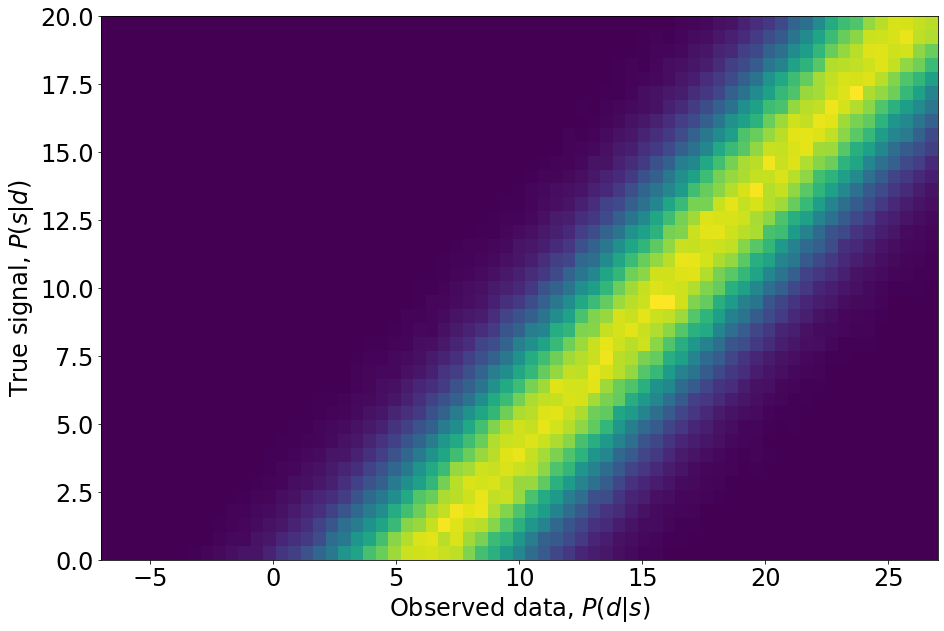

In [18]:


p2_bkgd = stats.norm.rvs(loc=6, scale=3, size=1000000)


signal_low = 0.0
signal_high = 20.0
p2_signal = np.random.uniform(low=signal_low, high=signal_high, size=1000000)

p2_data = p2_bkgd + p2_signal


signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)


p2_Psd, temp, temp2 = np.histogram2d(p2_data, p2_signal, bins=[dataedges,signaledges], density=True)


plot_2d_hist(signaledges, dataedges, p2_Psd)

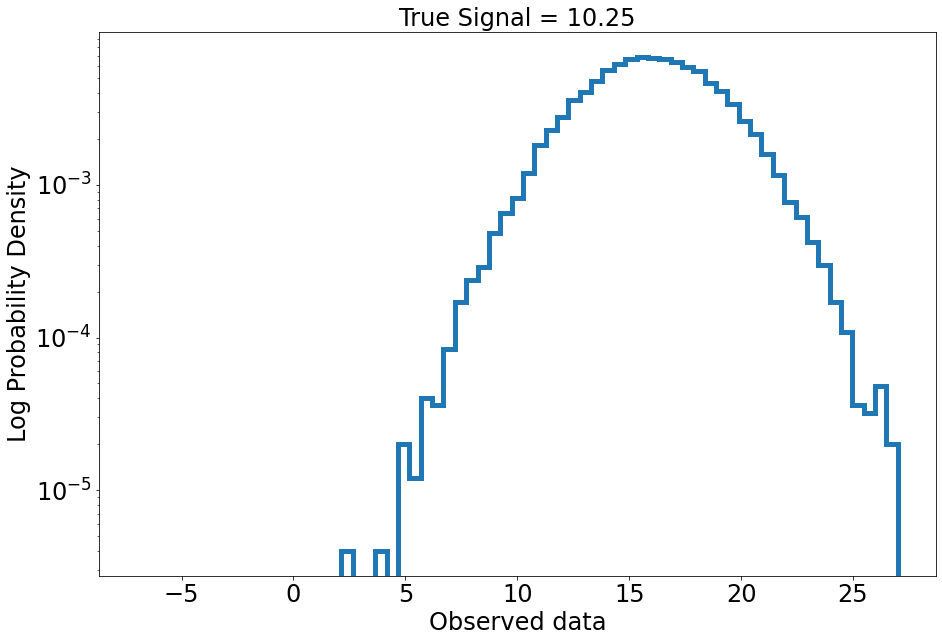

In [19]:
p2_true_signal = 10.25


p2_true_signal_bin_idx = -1
for i in range(0, len(signaledges)-1):
    if signaledges[i] <= p2_true_signal and signaledges[i+1] >= p2_true_signal:
        p2_true_signal_bin_idx = i
        break
        

p2_true_signal_probs = p2_Psd[:, p2_true_signal_bin_idx]


plt.stairs(p2_true_signal_probs, dataedges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'True Signal = {p2_true_signal:.2f}', fontsize=24)
plt.xlabel('Observed data', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a horizontal slice from the histogram plot. Thus the above plot gives a probability of Observed signals for a True Signal of 10.25 for our background which is mean = 6 and std. dev = 3.The mean for our plot is at (10.25 + 6) = 16.25.

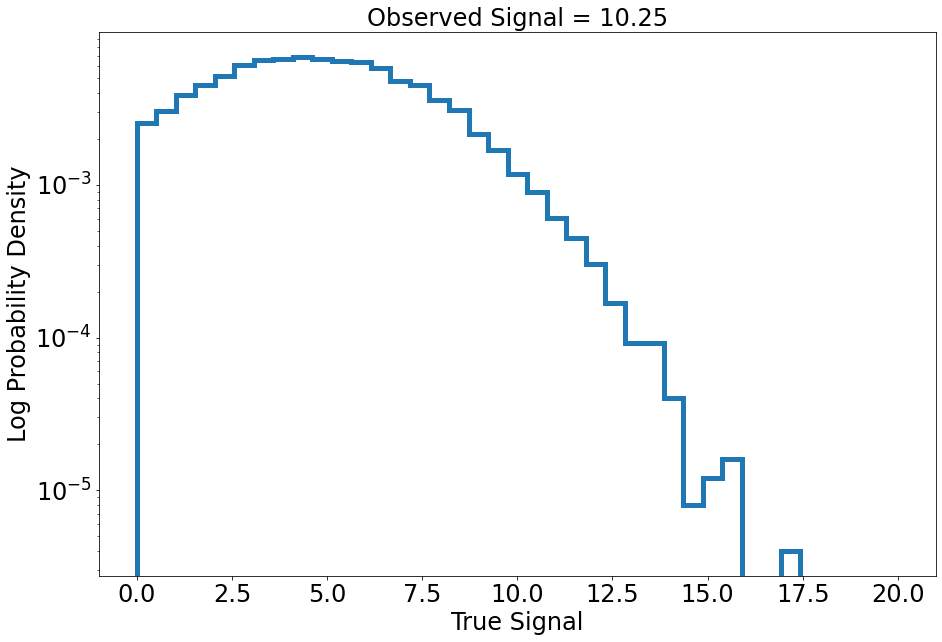

In [20]:

p2_observed_signal_bin_idx = 34
p2_observed_signal = dataedges[p2_observed_signal_bin_idx]
        

p2_observed_signal_probs = p2_Psd[p2_observed_signal_bin_idx, :]


plt.stairs(p2_observed_signal_probs, signaledges, linewidth=5)
plt.tick_params(labelsize=24)
plt.yscale('log')
plt.title(f'Observed Signal = {p2_observed_signal:.2f}', fontsize=24)
plt.xlabel('True Signal', fontsize=24)
plt.ylabel('Log Probability Density', fontsize=24)
plt.show()

Above we have plotted a vertical slice from the histogram plot.This gives the probability distribution of the True signal of when the observed signal is 10.25 for our background which is mean = 6 and std. dev = 3.The mean for our plot is at 10.25 - 6 = 4.25.

When we take the horizontal slice the mean gets added when we take the vertical slice the mean gets subtracted.For horizontal slices: when we shift the mean of the background right the mean of the probabilty distribution also shifts right.For vertical slices: when we shifted the background right we made events we changed the problability of different true signals along that vertical slice - making events that were less probable previously more probable and making events that were more probable previously less probable.

In [21]:
import os
os.system('jupyter nbconvert --to html hw5.ipynb')

0